In [ ]:
# 2023-02
# for a blog post on percolation theory

In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def moore_neighbors(i, j, n):
    return [pair for pair in 
            [
                (i-1, j-1),
                (i-1, j),
                (i-1, j+1),
                (i, j-1),
                (i, j+1),
                (i+1, j-1),
                (i+1, j),
                (i+1, j+1)
            ]
            if 0 <= pair[0] < n and 0 <= pair[1] < n
           ]

In [25]:
[[len(moore_neighbors(i, j, 5)) for i in range(5)] for j in range(5)]

[[3, 5, 5, 5, 3],
 [5, 8, 8, 8, 5],
 [5, 8, 8, 8, 5],
 [5, 8, 8, 8, 5],
 [3, 5, 5, 5, 3]]

In [27]:
def expand(i, j, board, reachable):
    if not reachable[i, j]:
        raise ValueError
    n = board.shape[-1]
    for pair in moore_neighbors(i, j, n):
        if board[pair] and not reachable[pair]:
            reachable[pair] = True
            expand(*pair, board, reachable)

In [45]:
boards = (np.random.random([3, 10, 10]) < 0.3)
reachable = (np.zeros_like(boards) == 1)

In [49]:
reachable[:, 0, :] = boards[:, 0, :]

In [50]:
board = boards[1]
n = board.shape[-1]
for i in range(n):
    if board[0, i]:
        expand(0, i, board, reachable[1])

0.5116 ± 0.00999730843777464


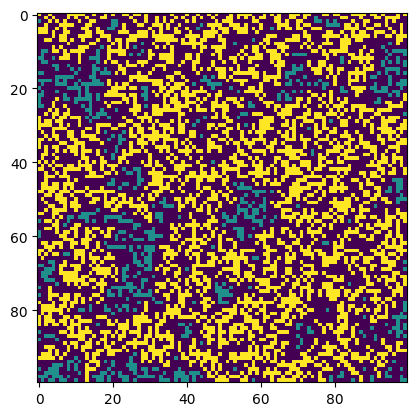

In [79]:
succ = 0
TRIALS = 10_000
for _ in range(TRIALS):
    n = 100
    board = (np.random.random([n, n]) < 0.408)
    reachable = (np.zeros_like(board) == 1)
    reachable[0] = board[0]
    for i in range(n):
        if board[0, i]:
            expand(0, i, board, reachable)
    if np.any(reachable[-1]):
        succ += 1
plt.imshow(board + 0 + reachable)
        
p = succ / TRIALS
print(f"{p} ± {2 * np.sqrt(p*(1-p)/TRIALS)}")

[0.40662128109689627, 0.46937871890310373]


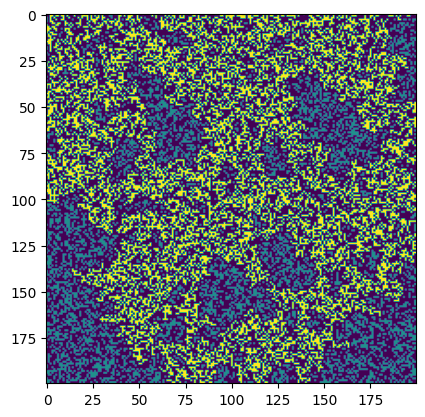

In [87]:
succ = 0
TRIALS = 1_000
for _ in range(TRIALS):
    n = 200
    board = (np.random.random([n, n]) < 0.406)
    reachable = (np.zeros_like(board) == 1)
    reachable[0] = board[0]
    for i in range(n):
        if board[0, i]:
            expand(0, i, board, reachable)
    if np.any(reachable[-1]):
        succ += 1
plt.imshow(board + 0 + reachable)
        
p = succ / TRIALS
print(f"[{p - 2 * np.sqrt(p*(1-p)/TRIALS)}, {p + 2 * np.sqrt(p*(1-p)/TRIALS)}]")

In [75]:
(.5-0.35)/(0.773-0.35) * 0.02

0.007092198581560284

.400: 0.35
.406: 0.4673 ± 0.01
.407: 0.4952 ± 0.01
.408: 0.5116 ± 0.01
.410: 0.5 ± 0.032
.420: 0.773